# **Slip 06 - Data Mining**


*Q1. Write a R program to create a data frame using two given vectors and display the duplicate
elements. [10 Marks]*

In [ ]:
names <- c("Sanchet", "Gaurav", "Ajinkya", "Gaurav", "Sanchet")
ages  <- c(21, 23, 22, 23, 21)

df <- data.frame(Name = names, Age = ages)

cat("Data Frame:\n")
print(df)

cat("\nDuplicate Rows:\n")
print(df[duplicated(df), ])

Data Frame:
     Name Age
1 Sanchet  21
2  Gaurav  23
3 Ajinkya  22
4  Gaurav  23
5 Sanchet  21

Duplicate Rows:
     Name Age
4  Gaurav  23
5 Sanchet  21


*Q2. Write a python program to implement hierarchical Agglomerative clustering algorithm.
(Download Customer.csv dataset from github.com).
[20 Marks]*

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


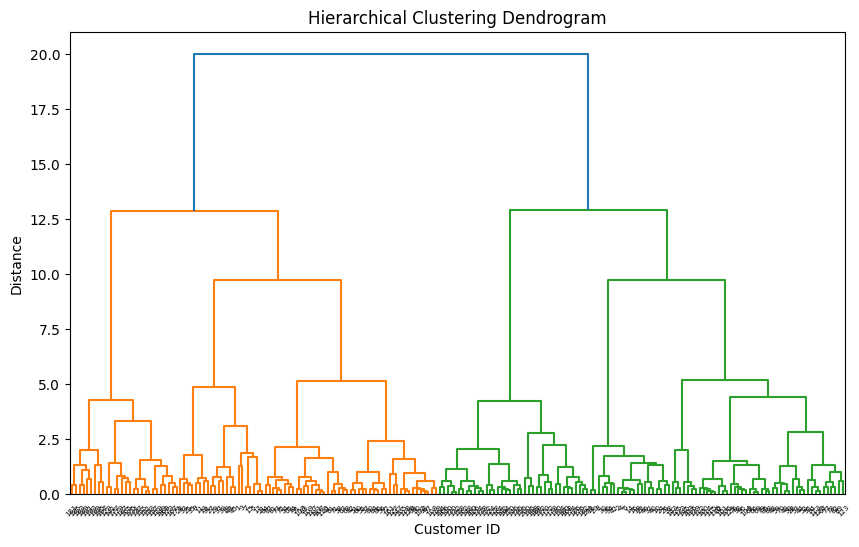

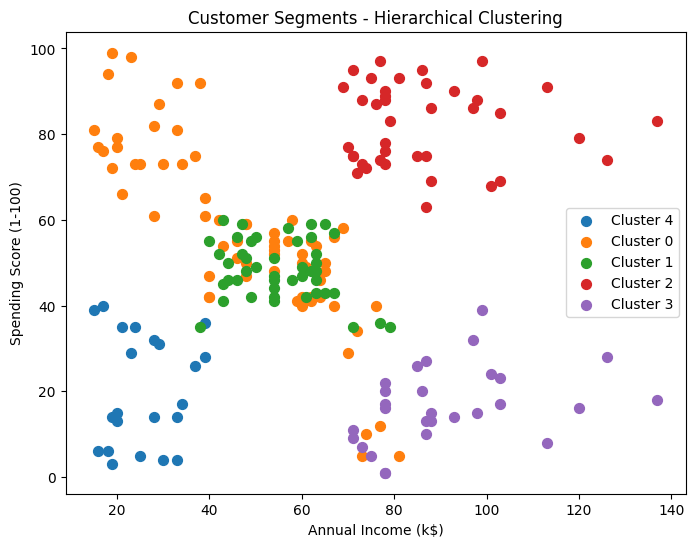

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("customer.csv")
print(df.head())

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X_scaled = StandardScaler().fit_transform(X)

# Dendrogram
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, labels=df["CustomerID"].values, leaf_rotation=45)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer ID")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster'] = cluster_model.fit_predict(X_scaled)

# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {cluster}', s=50)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments - Hierarchical Clustering')
plt.legend()
plt.show()
